In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
sns.set()

pd.set_option("display.max_rows", 5)
pd.set_option('display.max_columns',100)

In [29]:
df_form1 = pd.read_excel('dataset/formulario1.xlsx')
df_form1['bad_smell'] = df_form1['bad_smell'].str.lower().replace({"long method": "Long Method",
                           "métodos longos": "Long Method",
                           "método grande": "Long Method",
                           "longo método": "Long Method",
                           "método longo": "Long Method",
                           "método longo": "Long Method",
                           "método longo, muitos comentários":"Long Method",
                           "duplicade code":"Duplicade Code",
                           "código duplicado":"Duplicade Code",
                           "duplicated code":"Duplicade Code",
                           "codigo duplicado":"Duplicade Code",
                           "código duplicado,":"Duplicade Code",
                           "código duplicado + outro":"Duplicade Code",
                           "complexidade ciclomática": "Complexidade Ciclomática",
                           "método longo com grande complexidade ciclomatica":"Complexidade Ciclomática",
                           "método longo com grande complexidade ciclomatica, método invejoso":"Complexidade Ciclomática",
                           "grande complexidade ciclomática":"Complexidade Ciclomática",
                           "relativa complexidade ciclomática":"Complexidade Ciclomática",
                           "classe grande, muitos comentários": "Long Class",
                           "classe grande":"Long Class",
                           "classe longa":"Long Class",
                           "long class":"Long Class",
                           "god class":"Long Class",
                           "god method":"Long Method",
                           "longa lista de parâmetros":"Long Parameter List",
                           "métodos com muitos parâmetros":"Long Parameter List",
                           "método com muitos parâmetros":"Long Parameter List",
                           "long parameter list":"Long Parameter List",
                           "longa lista de parametros":"Long Parameter List",
                           "muitos parâmetros":"Long Parameter List",
                           "classe de dados":"Data Class",
                           "switch":"Switch",
                           "switch case":"Switch",
                           "uso indevido de switch":"Switch",
                           "switch statement":"Switch",
                           "método invejoso":"Envy",
                           "envy class":"Envy",
                           "sem valor": "No Value",
                           "nome do método pode ser melhor": "No Value",
                           "não utilização de padrão de nomenclatura": "No Value",
                           "se algo no cliente for alterado + precisará alterar em diversos arquivos + códigos semelhantes.": "No Value"})
display(df_form1['bad_smell'].unique())


df_form1['classe'] = df_form1['classe'].replace({
    "AGENCIA":"Agencia",
    "Agência":"Agencia",
    "agencia":"Agencia",
    "EMPRESA":"Empresa",
    "carteira":"Carteira"
})
display(df_form1['classe'].unique())
display(df_form1)

array(['Long Method', 'Duplicade Code', 'Complexidade Ciclomática',
       'Long Class', 'No Value', 'Long Parameter List', 'Data Class',
       'Switch', 'Envy'], dtype=object)

array(['Agencia', 'Carteira', 'Empresa', 'Climas', 'Estacao', 'Cliente',
       'Destino', 'sem valor'], dtype=object)

,nome,matricula,horario_inicio,horario_fim,classe,metodo,bad_smell,descricao,sugestao,refatoracao,nivel_dificuldade_encontrar,certeza_do_bad_smell
0,Thiago Abreu Lopes,469845.0,15:54:00,15:59:00,Agencia,AgendaViagem,Long Method,Método com muitas linhas de código,Fracionar esse único módulo em módulos menores\n,"Sim, a longo prazo pode vir a ser um problema ...",Fácil,Muita Certeza
1,Thiago Abreu Lopes,469845.0,15:59:00,16:01:00,Agencia,agendaViagemParaEstacao,Long Method,Método com muitas linhas de código,Fracionar esse único módulo em módulos menores,"Sim, a longo prazo pode vir a ser um problema ...",Intermediário,Intermediário
...,...,...,...,...,...,...,...,...,...,...,...,...
284,Vinicius Tabosa dos Santos,472107.0,16:14:00,16:19:00,Agencia,agendaViagemParaEstado,Duplicade Code,Sem valor,Criar uma classe com seus próprios métodos que...,"Sim, o método é logo e não faz sentido ficar n...",Fácil,Intermediário
285,Vinicius Tabosa dos Santos,472107.0,16:14:00,16:19:00,Agencia,agendaViagem2,Duplicade Code,Sem valor,Criar uma classe com seus próprios métodos que...,"Sim, o método é logo e não faz sentido ficar n...",Fácil,Intermediário


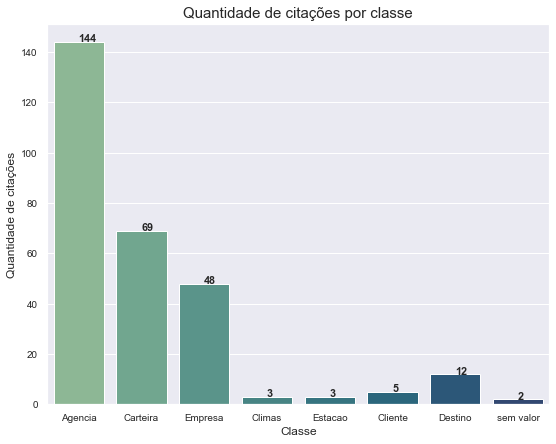

In [30]:
sns.set_style("whitegrid")
sns.set(font_scale=0.9)
bar,ax = plt.subplots(figsize=(9,7))
ax = sns.countplot(x=df_form1['classe'],  palette="crest",orient='v')
ax.set_title('Quantidade de citações por classe', fontsize=15)
ax.set_ylabel("Quantidade de citações", fontsize=12)
ax.set_xlabel("Classe", fontsize=12)
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.f"% rect.get_height(), weight='bold')

In [31]:
df_form1['bad_smell'].unique()

array(['Long Method', 'Duplicade Code', 'Complexidade Ciclomática',
       'Long Class', 'No Value', 'Long Parameter List', 'Data Class',
       'Switch', 'Envy'], dtype=object)

In [12]:
df_form1[df_form1['bad_smell']=='Long Class']

,nome,matricula,horario_inicio,horario_fim,classe,metodo,bad_smell,descricao,sugestao,refatoracao,nivel_dificuldade_encontrar,certeza_do_bad_smell
10,Akyla de Aquino Pinto,412723.0,15:51:00,15:55:00,Agencia,sem valor,Long Class,Classe com muitos métodos,Dividir em metodos menores,"Sim, pois atrapalha no entendimento, além de s...",Fácil,Muita Certeza
11,Akyla de Aquino Pinto,412723.0,16:04:00,16:11:00,Empresa,sem valor,Long Class,Classe com muitos métodos,Dividir em metodos menores,"Sim, pois atrapalha no entendimento, além de s...",Fácil,Muita Certeza
...,...,...,...,...,...,...,...,...,...,...,...,...
224,Mateus Paiva Alves,418121.0,16:00:00,16:06:00,Agencia,A classe toda,Long Class,Sem valor,Reduzir a quantidade de tarefas da classe,"Sim, facilitaria o entendimento do código",Fácil,Intermediário
229,Milton César Xavier Dutra,379009.0,15:52:00,16:00:00,Agencia,Sem valor,Long Class,Classe muito grande com muitos métodos que pod...,Dividir a classe em outras classes com os méto...,Sim. É necessário para aumentar a legibilidade...,Fácil,Muita Certeza


In [18]:
df_form1['metodo'] = df_form1['metodo'].str.lower()

In [ ]:
df_form1['metodo'].replace({
    'agenciaviagem':'agendaviagem',
    'agendaviagemparaestaacao':'agendaviagemparaestacao',
})

In [27]:
df_form1[df_form1['metodo']=='carteira']

,nome,matricula,horario_inicio,horario_fim,classe,metodo,bad_smell,descricao,sugestao,refatoracao,nivel_dificuldade_encontrar,certeza_do_bad_smell
52,Daniel Araujo Paiva,432312.0,16:14:00,16:15:00,Carteira,carteira,Long Parameter List,Método possui uma longa lista de parâmetros,Criar objetos para trabalhar com esses parâmetros,"Sim, métodos com muitos parâmetros tem grandes...",Fácil,Muita Certeza
92,GABRIEL SOUZA,543896.0,16:12:00,16:14:00,Carteira,carteira,Long Parameter List,sem valor,Refatorar para receber os parametros de uma fo...,sem valor,Fácil,Muita Certeza


In [20]:
df_form1['metodo'].unique()

array(['agendaviagem', 'agendaviagemparaestacao', 'agendaviagem2',
       'compra', 'agenciaviagem', 'sem valor', 'agendaviagemparaestaacao',
       'calculasaldoagencia', 'calculasaldoagencia2',
       'calculasaldoagencia3', 'compranodebito', 'compranodebito2',
       'listatodosclientes', 'listatodosclientesativos',
       'listatodosclientesinativos', 'compranodebitoupdate',
       'compranocredito', 'podecomprarnocredito', 'carteira', 'cliente',
       'destino', 'adicionadestino', 'calculasaldoagencia1',
       'comprasaldo', 'construtores da classe', 'buscaclienteativo',
       'agendaviagem3', 'adicionacliente', 'removecliente',
       'buscacliente', 'compranodebitouptade', 'public agencia',
       'construtor', 'calculasaldoagencia;', 'calculasaldoagencia2;',
       'compranocredito;', 'empresa', 'agenciacalculasaldoagencia3',
       'adiciona destido', 'a classe toda', 'construtor da classe',
       'a maioria que não foi gerada pela ide.',
       'adiciona novo cliente ao m